In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch import nn

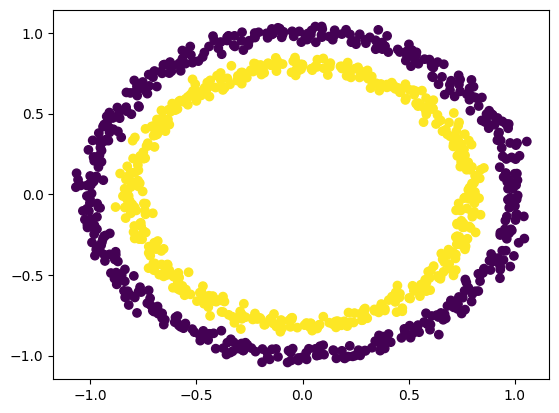

In [2]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=0)

data = np.hstack((X, y.reshape(-1,1)))
df = pd.DataFrame(data)

fig, ax = plt.subplots()
ax.scatter(x=X[:,0], y=X[:,1],c=y)

In [3]:
Xpy = torch.from_numpy(X).type(torch.float)
ypy = torch.from_numpy(y).type(torch.float)

Xpy_train, Xpy_test, ypy_train, ypy_test = train_test_split(Xpy,ypy, test_size=0.2, random_state=0)

device = "cuda" if torch.cuda.is_available() else "cpu"

class CircleClassificationModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        layer_1_value = self.layer_1(x)
        return self.layer_2(layer_1_value)
    

In [15]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=20),
    nn.Hardtanh(),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=1),
)
model_0.to(device)

def activation_fn(x):
    """
    Sigmoid activation function\n
    This is mathematically equivalent to torch.sigmoid\n
    Implemented for educational purposes\n
    This breaks sometimes due to lack of handling precision
    """
    return 1 / (1 + torch.exp(-1*x))

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

amount_of_epochs = 0
while True:
    amount_of_epochs += 1
    y_logits = model_0(Xpy_train.to(device))
    y_pred = activation_fn(y_logits).reshape(-1)
    loss = criterion(y_pred, ypy_train.to(device))
    if amount_of_epochs % 300 == 0:
        print(f"Epoch: {amount_of_epochs} | Loss: {loss}")
    if loss < 0.01:
        break
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f"Training loss: {loss} after {amount_of_epochs} epochs")


Training loss: 0.009999874047935009 after 285 epochs


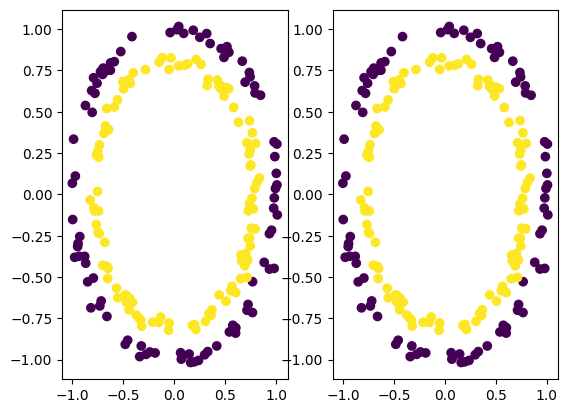

In [16]:
y_pred = torch.round(torch.sigmoid(model_0(Xpy_test)))

fig, ax = plt.subplots(ncols=2)
ax[0].scatter(Xpy_test[:,0], Xpy_test[:,1], c=ypy_test)
ax[1].scatter(Xpy_test[:,0], Xpy_test[:,1], c=y_pred.detach())